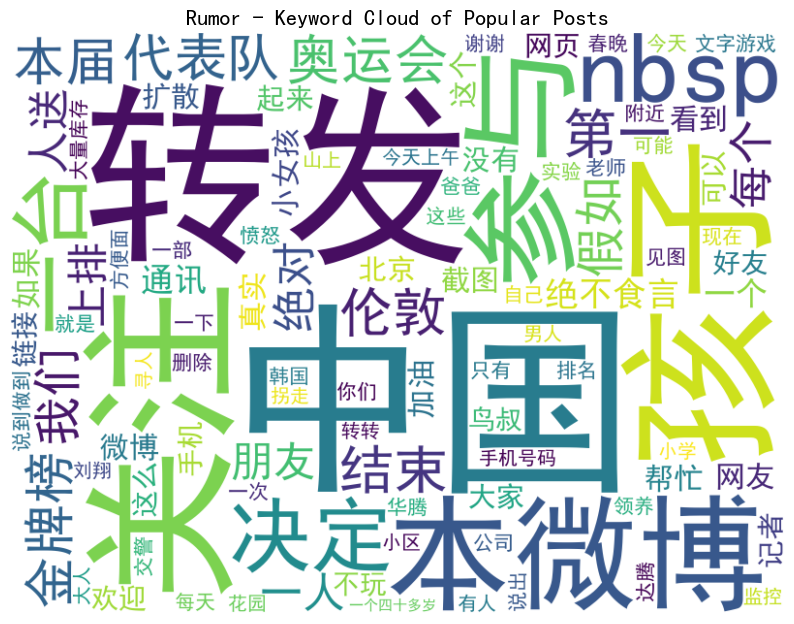

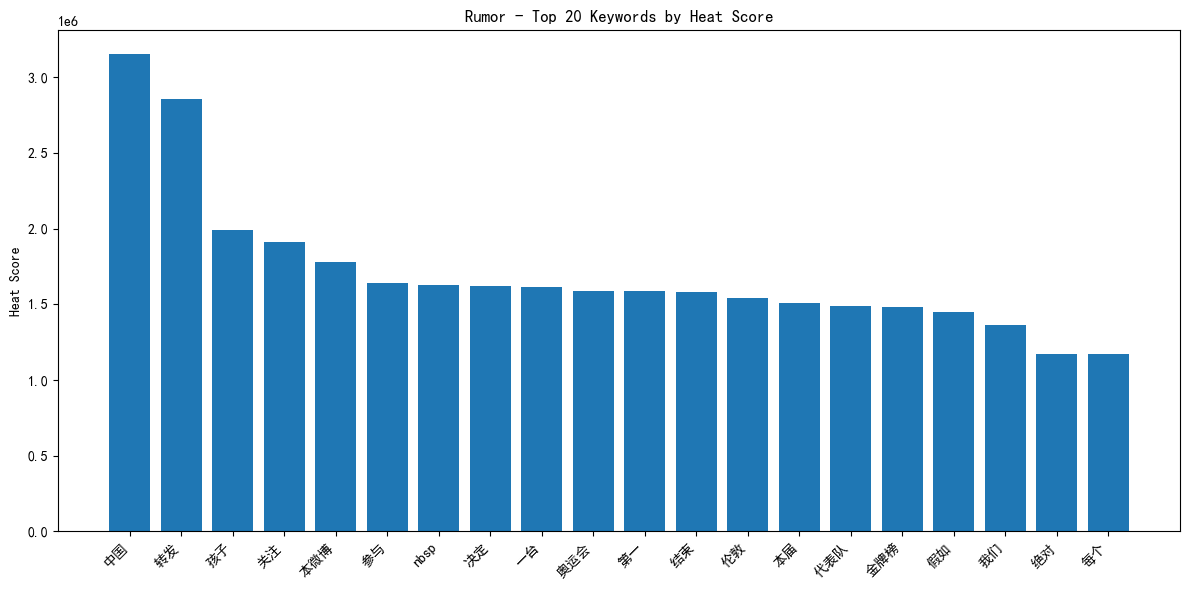

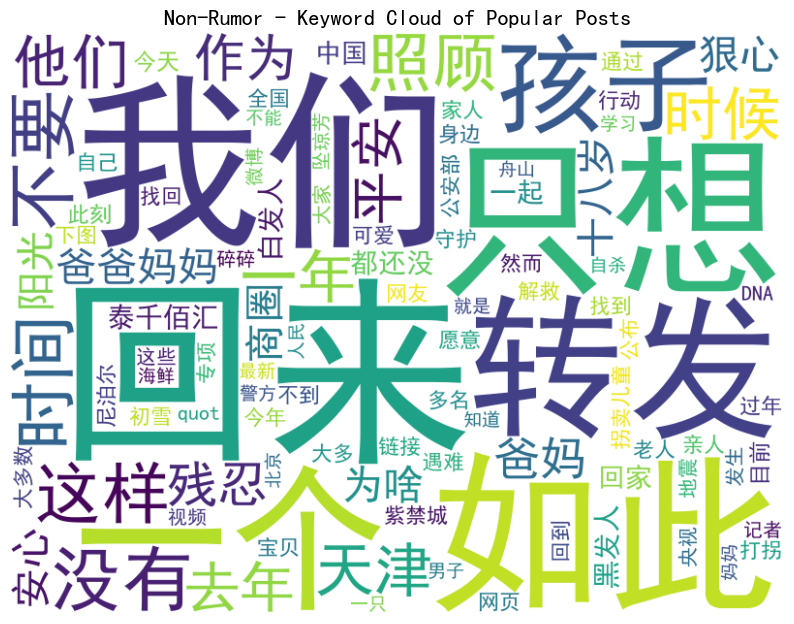

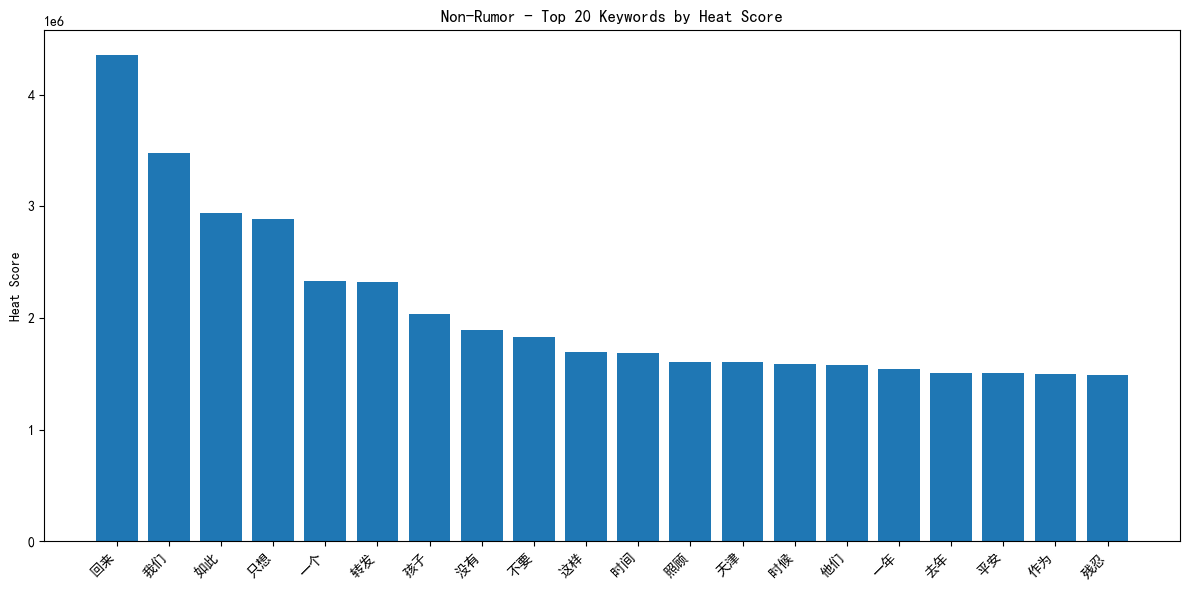

In [14]:
import os
import jieba
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from matplotlib import rcParams

# 设置 matplotlib 中文显示
rcParams['font.sans-serif'] = ['SimHei']
rcParams['axes.unicode_minus'] = False

# ---------- 路径设置 ----------
base_path = r'D:\CS5344'
result_path = os.path.join(base_path, 'popularity_result')
os.makedirs(result_path, exist_ok=True)

rumor_files = ['train_rumor.txt', 'test_rumor.txt']
nonrumor_files = ['train_nonrumor.txt', 'test_nonrumor.txt']

# ---------- 提取关键词热度 ----------
def extract_keyword_heat(file_list):
    heat_map = defaultdict(int)

    for filename in file_list:
        full_path = os.path.join(base_path, filename)
        with open(full_path, 'r', encoding='utf-8') as f:
            lines = f.readlines()

        for i in range(0, len(lines), 3):
            try:
                meta = lines[i].strip().split('|')
                text = lines[i + 2].strip()

                reposts = int(meta[6])
                comments = int(meta[7])
                likes = int(meta[8])
                heat = reposts * 2 + comments + likes

                keywords = jieba.lcut(text)
                for kw in keywords:
                    if len(kw.strip()) > 1 and kw.isalpha():
                        heat_map[kw] += heat
            except Exception as e:
                print(f"Skipped record in {filename}: {e}")

    return heat_map

# ---------- 绘图并保存 ----------
def plot_wordcloud_and_bar(df, title_prefix, save_prefix):
    # WordCloud
    wordcloud = WordCloud(
        font_path='C:/Windows/Fonts/simhei.ttf',
        background_color='white',
        width=800,
        height=600
    ).generate_from_frequencies(dict(df.head(100).values))

    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'{title_prefix} - Keyword Cloud of Popular Posts', fontsize=16)
    wordcloud_path = os.path.join(result_path, f'{save_prefix}_wordcloud.png')
    plt.savefig(wordcloud_path, bbox_inches='tight')
    plt.show()

    # Bar Chart
    top20 = df.head(20)
    plt.figure(figsize=(12, 6))
    plt.bar(top20['Keyword'], top20['Heat'])
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Heat Score')
    plt.title(f'{title_prefix} - Top 20 Keywords by Heat Score')
    plt.tight_layout()
    bar_path = os.path.join(result_path, f'{save_prefix}_barchart.png')
    plt.savefig(bar_path, bbox_inches='tight')
    plt.show()

# ---------- 主流程 ----------
# rumor
rumor_heat = extract_keyword_heat(rumor_files)
df_rumor = pd.DataFrame(rumor_heat.items(), columns=['Keyword', 'Heat'])
df_rumor = df_rumor.sort_values(by='Heat', ascending=False)
df_rumor.to_csv(os.path.join(result_path, 'rumor_keyword_heat.csv'), index=False, encoding='utf-8-sig')
plot_wordcloud_and_bar(df_rumor, 'Rumor', 'rumor')

# non-rumor
nonrumor_heat = extract_keyword_heat(nonrumor_files)
df_nonrumor = pd.DataFrame(nonrumor_heat.items(), columns=['Keyword', 'Heat'])
df_nonrumor = df_nonrumor.sort_values(by='Heat', ascending=False)
df_nonrumor.to_csv(os.path.join(result_path, 'nonrumor_keyword_heat.csv'), index=False, encoding='utf-8-sig')
plot_wordcloud_and_bar(df_nonrumor, 'Non-Rumor', 'nonrumor')


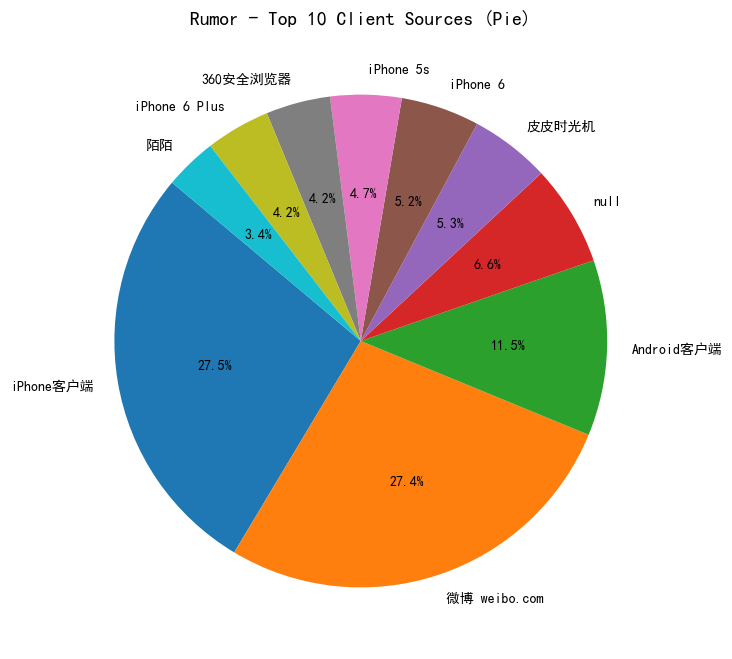

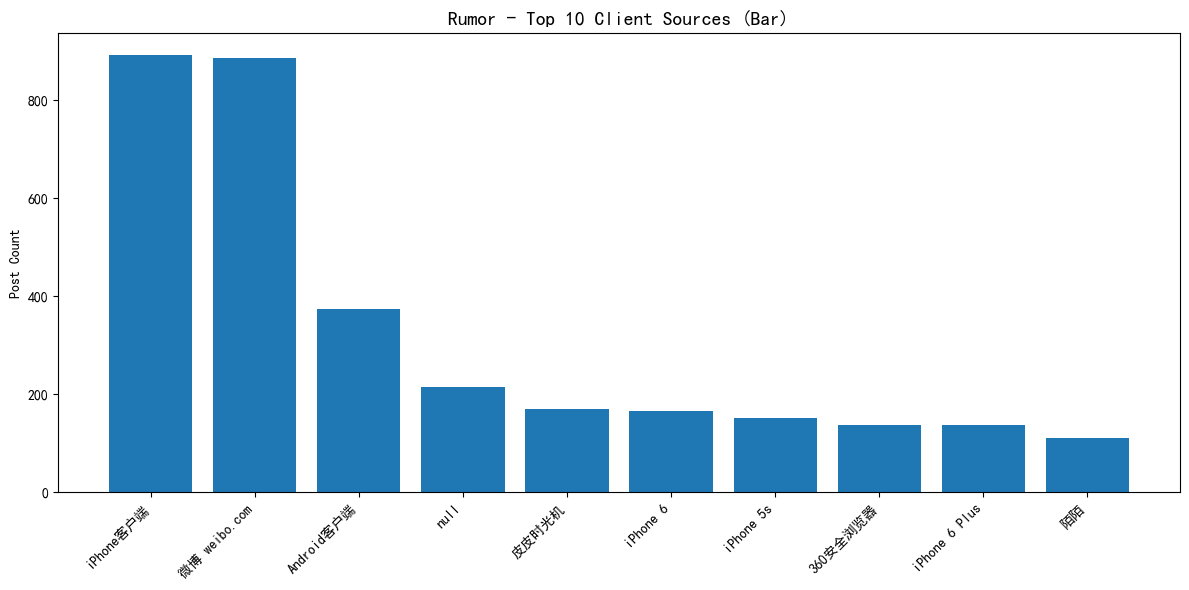

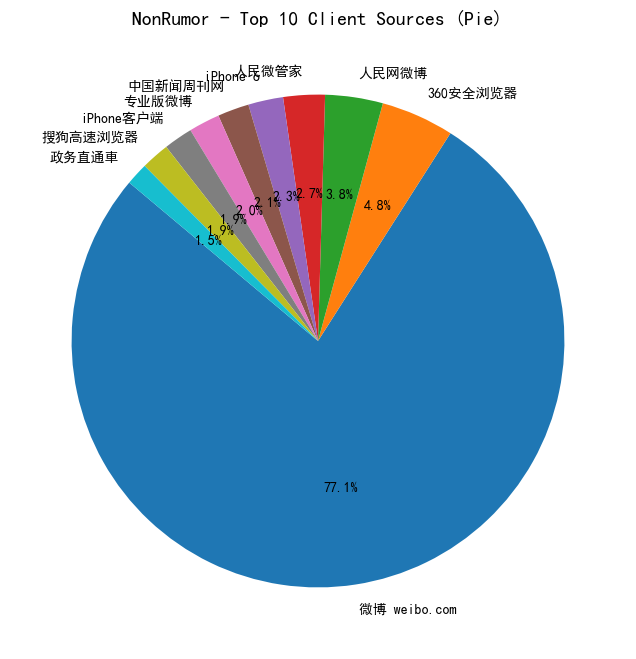

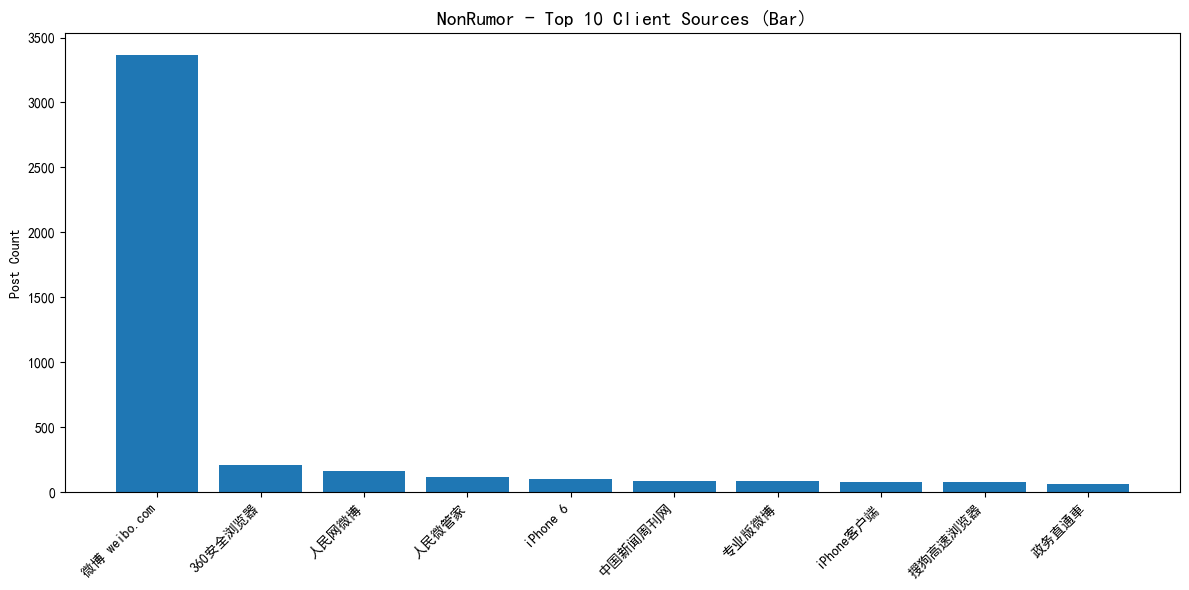

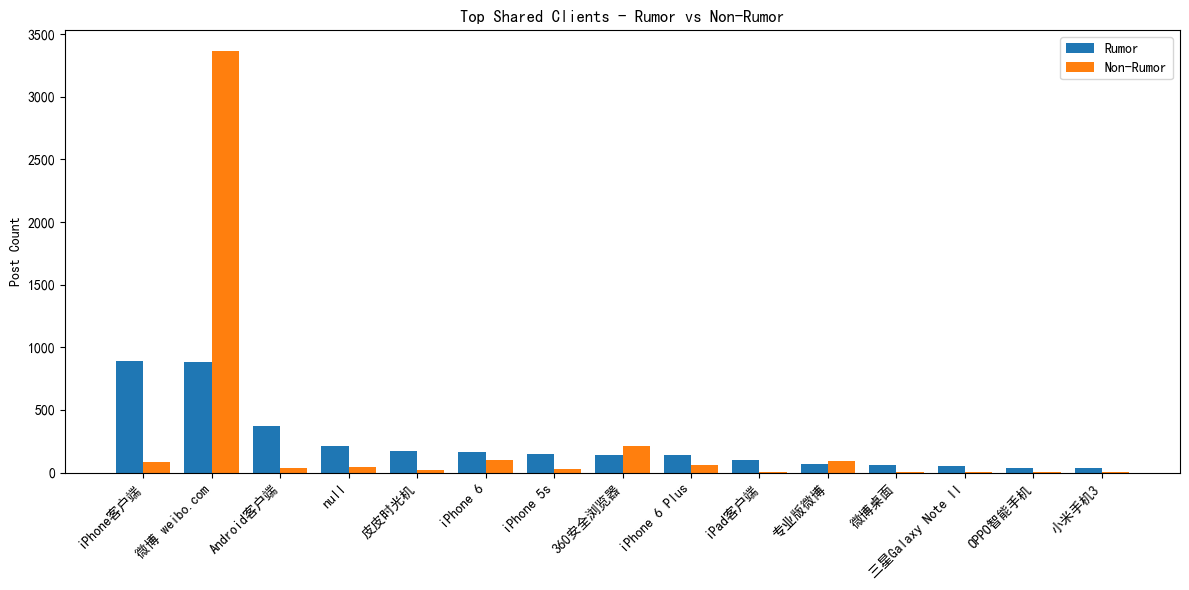

In [13]:
import os
import jieba
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
from matplotlib import rcParams

# 设置 matplotlib 中文支持
rcParams['font.sans-serif'] = ['SimHei']
rcParams['axes.unicode_minus'] = False

# 路径设置
base_path = r'D:\CS5344\client_distribution_result'
os.makedirs(base_path, exist_ok=True)

file_groups = {
    'Rumor': ['train_rumor.txt', 'test_rumor.txt'],
    'NonRumor': ['train_nonrumor.txt', 'test_nonrumor.txt']
}

# 客户端来源统计函数
def analyze_client_sources(file_list, tag):
    source_counter = defaultdict(int)

    for filename in file_list:
        full_path = os.path.join(r'D:\CS5344', filename)
        with open(full_path, 'r', encoding='utf-8') as f:
            lines = f.readlines()

        for i in range(0, len(lines), 3):
            try:
                meta = lines[i].strip().split('|')
                source = meta[14].strip()
                if source:
                    source_counter[source] += 1
            except Exception as e:
                print(f"跳过异常记录 in {filename}: {e}")

    df = pd.DataFrame(source_counter.items(), columns=['ClientSource', f'{tag}_Count'])
    df = df.sort_values(by=f'{tag}_Count', ascending=False)
    return df

# 可视化保存
def plot_pie_and_bar(df, group_name):
    top = df.head(10)

    # 饼图
    plt.figure(figsize=(8, 8))
    plt.pie(top.iloc[:, 1], labels=top['ClientSource'], autopct='%1.1f%%', startangle=140)
    plt.title(f'{group_name} - Top 10 Client Sources (Pie)', fontsize=14)
    plt.savefig(os.path.join(base_path, f'{group_name.lower()}_client_pie.png'), bbox_inches='tight')
    plt.show()

    # 柱状图
    plt.figure(figsize=(12, 6))
    plt.bar(top['ClientSource'], top.iloc[:, 1])
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Post Count')
    plt.title(f'{group_name} - Top 10 Client Sources (Bar)', fontsize=14)
    plt.tight_layout()
    plt.savefig(os.path.join(base_path, f'{group_name.lower()}_client_bar.png'), bbox_inches='tight')
    plt.show()

# 分析 rumor 与 non-rumor
df_rumor = analyze_client_sources(file_groups['Rumor'], 'Rumor')
df_nonrumor = analyze_client_sources(file_groups['NonRumor'], 'NonRumor')

# 保存各自客户端表
df_rumor.to_csv(os.path.join(base_path, 'rumor_client_sources.csv'), index=False, encoding='utf-8-sig')
df_nonrumor.to_csv(os.path.join(base_path, 'nonrumor_client_sources.csv'), index=False, encoding='utf-8-sig')

# 可视化
plot_pie_and_bar(df_rumor, 'Rumor')
plot_pie_and_bar(df_nonrumor, 'NonRumor')

# ---------- 对比分析 ----------
df_compare = pd.merge(df_rumor, df_nonrumor, on='ClientSource', how='outer').fillna(0)
df_compare[['Rumor_Count', 'NonRumor_Count']] = df_compare[['Rumor_Count', 'NonRumor_Count']].astype(int)

# 客户端分组
only_rumor = df_compare[(df_compare['Rumor_Count'] > 0) & (df_compare['NonRumor_Count'] == 0)]
only_nonrumor = df_compare[(df_compare['NonRumor_Count'] > 0) & (df_compare['Rumor_Count'] == 0)]
both = df_compare[(df_compare['Rumor_Count'] > 0) & (df_compare['NonRumor_Count'] > 0)]

# 保存结果
only_rumor.to_csv(os.path.join(base_path, 'clients_only_in_rumor.csv'), index=False, encoding='utf-8-sig')
only_nonrumor.to_csv(os.path.join(base_path, 'clients_only_in_nonrumor.csv'), index=False, encoding='utf-8-sig')
both.to_csv(os.path.join(base_path, 'clients_in_both.csv'), index=False, encoding='utf-8-sig')

# 可视化同时出现在两类中的客户端对比
top_both = both.sort_values(by='Rumor_Count', ascending=False).head(15)

plt.figure(figsize=(12, 6))
bar_width = 0.4
x = range(len(top_both))
plt.bar([i - bar_width / 2 for i in x], top_both['Rumor_Count'], width=bar_width, label='Rumor')
plt.bar([i + bar_width / 2 for i in x], top_both['NonRumor_Count'], width=bar_width, label='Non-Rumor')
plt.xticks(x, top_both['ClientSource'], rotation=45, ha='right')
plt.ylabel('Post Count')
plt.title('Top Shared Clients - Rumor vs Non-Rumor')
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(base_path, 'shared_clients_bar_compare.png'), bbox_inches='tight')
plt.show()

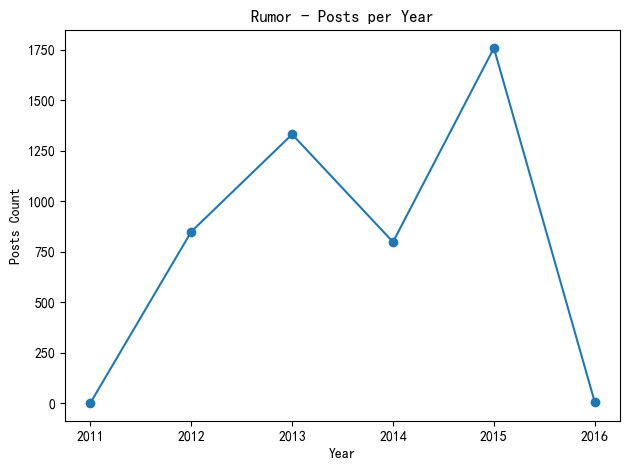

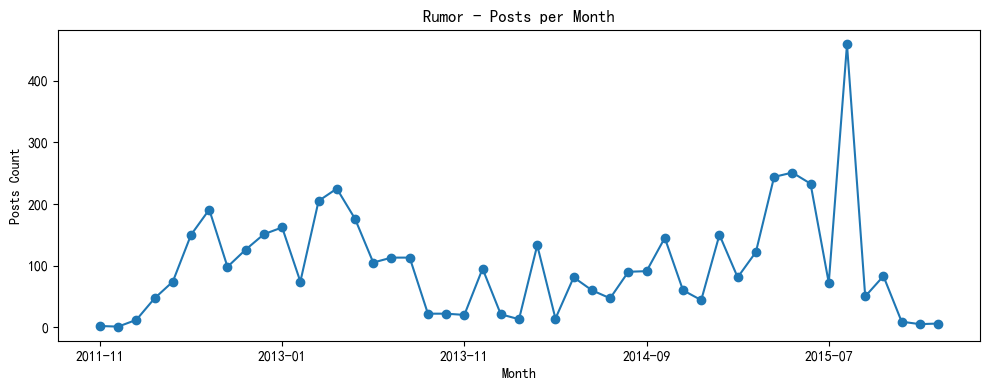

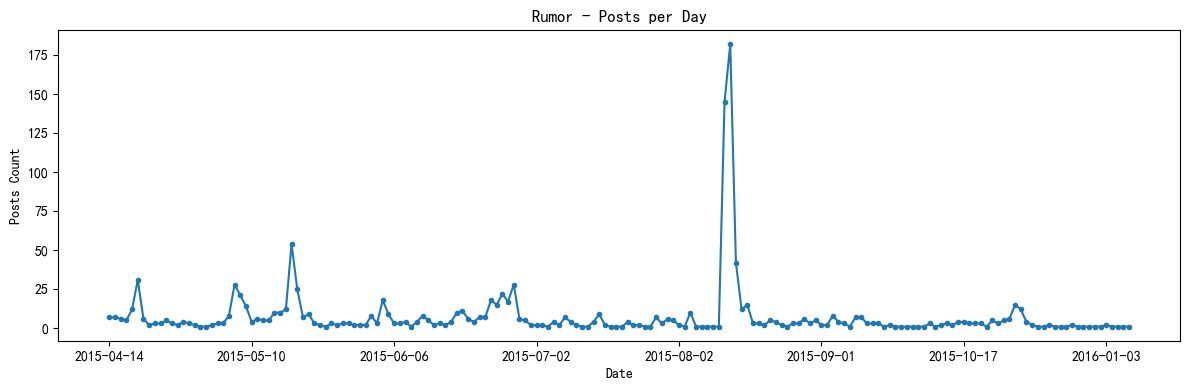

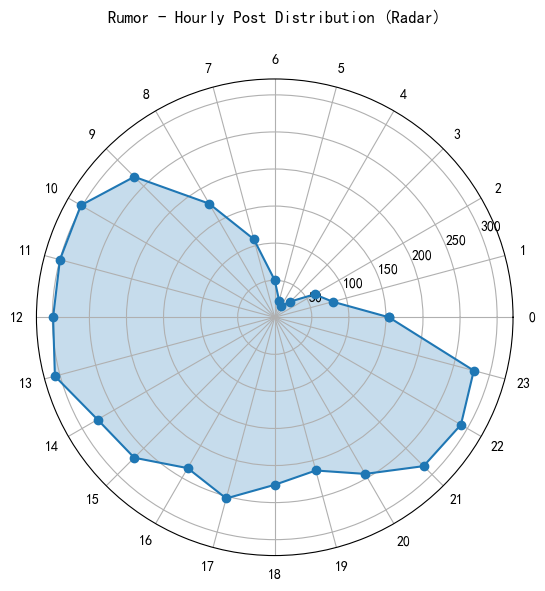

Skipped time parsing in train_nonrumor.txt: time data '1452440393000' does not match format '%Y-%m-%d %H:%M'
Skipped time parsing in train_nonrumor.txt: time data '1445912087000' does not match format '%Y-%m-%d %H:%M'
Skipped time parsing in train_nonrumor.txt: time data '1445415303000' does not match format '%Y-%m-%d %H:%M'
Skipped time parsing in train_nonrumor.txt: time data '1445383116000' does not match format '%Y-%m-%d %H:%M'
Skipped time parsing in train_nonrumor.txt: time data '1445062843000' does not match format '%Y-%m-%d %H:%M'
Skipped time parsing in train_nonrumor.txt: time data '1444951863000' does not match format '%Y-%m-%d %H:%M'
Skipped time parsing in train_nonrumor.txt: time data '1451611803000' does not match format '%Y-%m-%d %H:%M'
Skipped time parsing in train_nonrumor.txt: time data '1451610502000' does not match format '%Y-%m-%d %H:%M'
Skipped time parsing in train_nonrumor.txt: time data '1450945803000' does not match format '%Y-%m-%d %H:%M'
Skipped time parsin

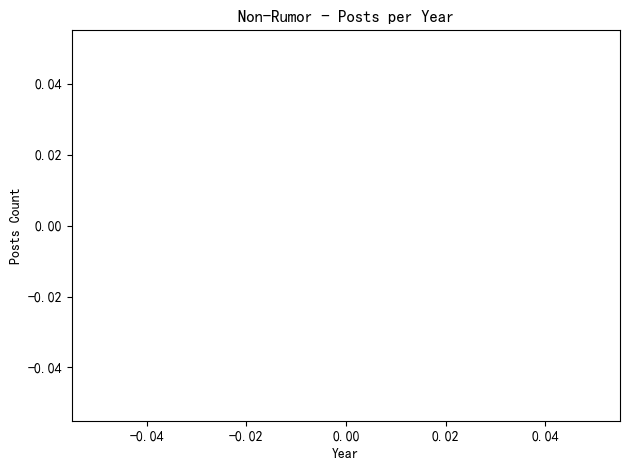

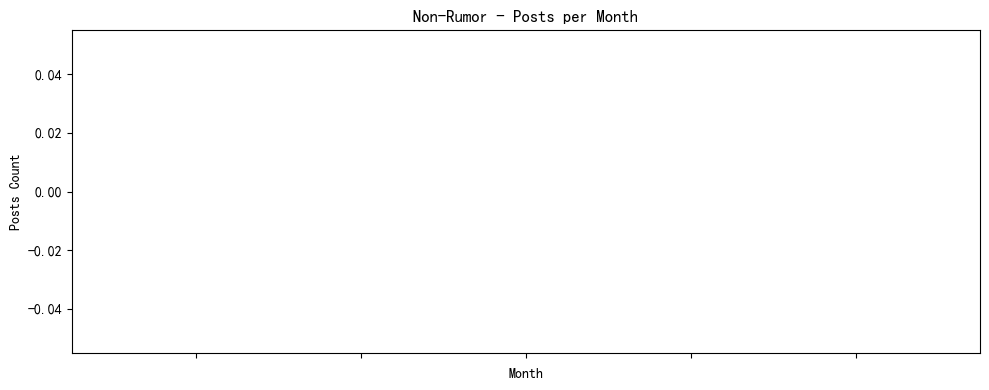

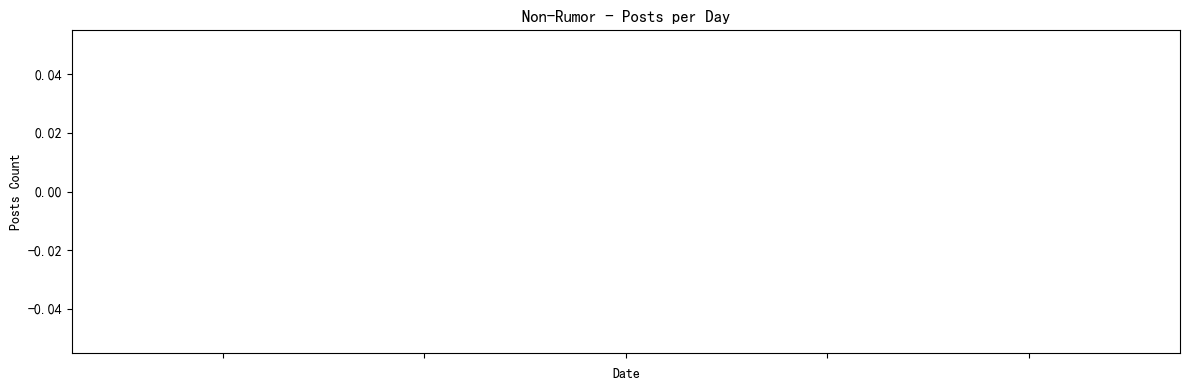

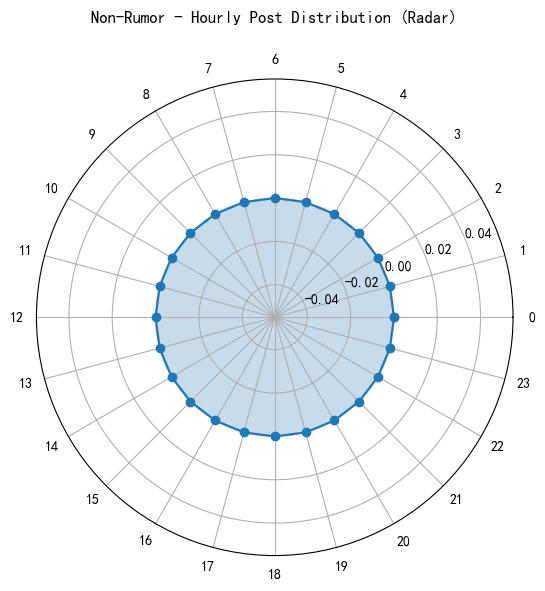

In [17]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from datetime import datetime
import numpy as np

# 设置中文支持
rcParams['font.sans-serif'] = ['SimHei']
rcParams['axes.unicode_minus'] = False

# ---------- 路径 ----------
base_path = r'D:\CS5344'
result_path = os.path.join(base_path, 'time_result')
os.makedirs(result_path, exist_ok=True)

rumor_files = ['train_rumor.txt', 'test_rumor.txt']
nonrumor_files = ['train_nonrumor.txt', 'test_nonrumor.txt']

# ---------- 提取时间 ----------
def extract_time_series(file_list):
    all_times = []
    for filename in file_list:
        full_path = os.path.join(base_path, filename)
        with open(full_path, 'r', encoding='utf-8') as f:
            lines = f.readlines()

        for i in range(0, len(lines), 3):
            try:
                meta = lines[i].strip().split('|')
                time_str = meta[4]
                post_time = datetime.strptime(time_str, "%Y-%m-%d %H:%M")
                all_times.append(post_time)
            except Exception as e:
                print(f"Skipped time parsing in {filename}: {e}")
    return pd.Series(all_times)

# ---------- 时间分布图 ----------
def plot_time_distribution(series, group_name):
    # ✅ 转换为 datetime 类型并去除无效值
    series = pd.to_datetime(series, errors='coerce')
    series = series.dropna()

    df = pd.DataFrame({'datetime': series})
    df['year'] = df['datetime'].dt.year
    df['month'] = df['datetime'].dt.to_period('M').astype(str)
    df['day'] = df['datetime'].dt.to_period('D').astype(str)
    df['hour'] = df['datetime'].dt.hour

    # ---- 年度分布 ----
    year_counts = df['year'].value_counts().sort_index()
    year_counts.plot(kind='line', marker='o', title=f'{group_name} - Posts per Year')
    plt.xlabel('Year')
    plt.ylabel('Posts Count')
    plt.tight_layout()
    plt.savefig(os.path.join(result_path, f'{group_name.lower()}_year_distribution.png'))
    plt.show()

    # ---- 月度分布 ----
    month_counts = df['month'].value_counts().sort_index()
    month_counts.plot(kind='line', marker='o', figsize=(10, 4), title=f'{group_name} - Posts per Month')
    plt.xlabel('Month')
    plt.ylabel('Posts Count')
    plt.tight_layout()
    plt.savefig(os.path.join(result_path, f'{group_name.lower()}_month_distribution.png'))
    plt.show()

    # ---- 日分布（取近半年） ----
    day_counts = df['day'].value_counts().sort_index()
    if len(day_counts) > 180:
        day_counts = day_counts[-180:]

    day_counts.plot(kind='line', marker='.', figsize=(12, 4), title=f'{group_name} - Posts per Day')
    plt.xlabel('Date')
    plt.ylabel('Posts Count')
    plt.tight_layout()
    plt.savefig(os.path.join(result_path, f'{group_name.lower()}_day_distribution.png'))
    plt.show()

    # ---- 小时雷达图 ----
    hour_counts = df['hour'].value_counts().sort_index()
    hour_counts = hour_counts.reindex(range(24), fill_value=0)

    labels = [str(h) for h in range(24)]
    values = hour_counts.values.tolist()
    values += values[:1]  # 闭合雷达图
    angles = np.linspace(0, 2 * np.pi, 25)

    fig = plt.figure(figsize=(6, 6))
    ax = plt.subplot(111, polar=True)
    ax.plot(angles, values, marker='o')
    ax.fill(angles, values, alpha=0.25)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)
    ax.set_title(f'{group_name} - Hourly Post Distribution (Radar)', y=1.1)
    plt.tight_layout()
    plt.savefig(os.path.join(result_path, f'{group_name.lower()}_hourly_radar.png'))
    plt.show()

# ---------- 执行分析 ----------
rumor_times = extract_time_series(rumor_files)
plot_time_distribution(rumor_times, 'Rumor')

nonrumor_times = extract_time_series(nonrumor_files)
plot_time_distribution(nonrumor_times, 'Non-Rumor')


✔ Loaded 4748 user records from ['train_rumor.txt', 'test_rumor.txt']


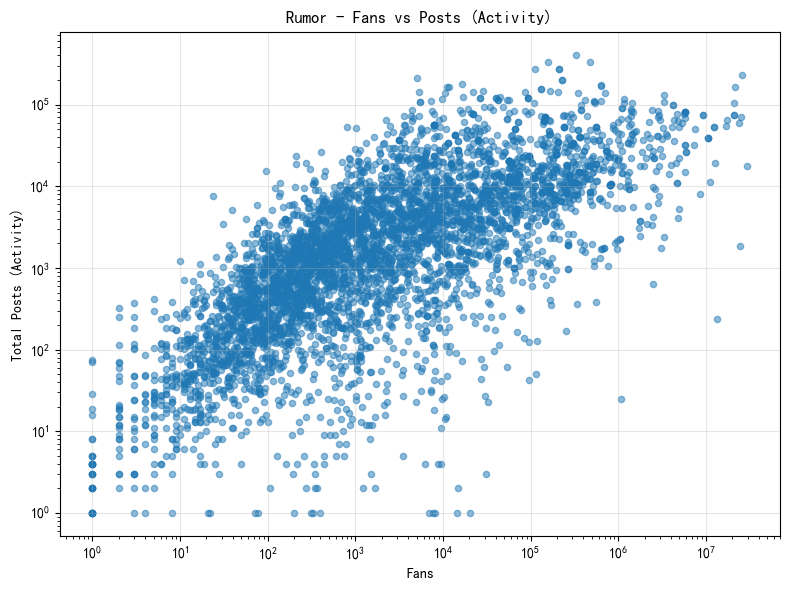

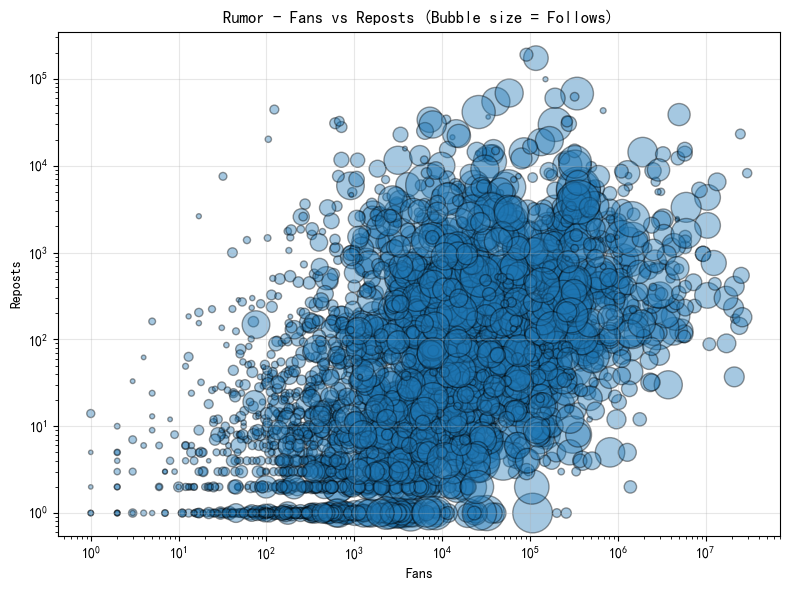

跳过错误记录 in train_nonrumor.txt: invalid literal for int() with base 10: 'null'
跳过错误记录 in train_nonrumor.txt: invalid literal for int() with base 10: 'null'
跳过错误记录 in train_nonrumor.txt: invalid literal for int() with base 10: 'null'
跳过错误记录 in train_nonrumor.txt: invalid literal for int() with base 10: 'null'
跳过错误记录 in train_nonrumor.txt: invalid literal for int() with base 10: 'null'
跳过错误记录 in train_nonrumor.txt: invalid literal for int() with base 10: 'null'
跳过错误记录 in train_nonrumor.txt: invalid literal for int() with base 10: 'null'
跳过错误记录 in train_nonrumor.txt: invalid literal for int() with base 10: 'null'
跳过错误记录 in train_nonrumor.txt: invalid literal for int() with base 10: 'null'
跳过错误记录 in train_nonrumor.txt: invalid literal for int() with base 10: 'null'
跳过错误记录 in train_nonrumor.txt: invalid literal for int() with base 10: 'null'
跳过错误记录 in train_nonrumor.txt: invalid literal for int() with base 10: 'null'
跳过错误记录 in train_nonrumor.txt: invalid literal for int() with base 10: 'null'

In [21]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams

# 设置 matplotlib 中文支持
rcParams['font.sans-serif'] = ['SimHei']
rcParams['axes.unicode_minus'] = False

# ---------- 路径配置 ----------
base_path = r'D:\CS5344'
result_path = os.path.join(base_path, 'user_influence_result')
os.makedirs(result_path, exist_ok=True)

rumor_files = ['train_rumor.txt', 'test_rumor.txt']
nonrumor_files = ['train_nonrumor.txt', 'test_nonrumor.txt']

# ---------- 提取用户字段 ----------
def extract_user_stats(file_list):
    records = []
    for filename in file_list:
        full_path = os.path.join(base_path, filename)
        with open(full_path, 'r', encoding='utf-8') as f:
            lines = f.readlines()

        for i in range(0, len(lines), 3):
            try:
                meta = lines[i].strip().split('|')

                # 保证字段足够
                if len(meta) < 14:
                    continue

                user_id = meta[9]
                reposts = int(meta[6])
                fans = int(meta[11])
                follows = int(meta[12])
                total_posts = int(meta[13])

                records.append({
                    'user_id': user_id,
                    'reposts': reposts,
                    'fans': fans,
                    'follows': follows,
                    'total_posts': total_posts
                })
            except Exception as e:
                print(f"跳过错误记录 in {filename}: {e}")

    df = pd.DataFrame(records)
    print(f"✔ Loaded {len(df)} user records from {file_list}")
    return df

# ---------- 可视化 ----------
def plot_user_influence(df, group_name):
    save_prefix = group_name.lower()

    if df.empty:
        print(f"⚠ No data to plot for {group_name}")
        return

    # 散点图：粉丝数 vs 活跃度
    plt.figure(figsize=(8, 6))
    plt.scatter(df['fans'], df['total_posts'], alpha=0.5, s=20)
    plt.xlabel('Fans')
    plt.ylabel('Total Posts (Activity)')
    plt.title(f'{group_name} - Fans vs Posts (Activity)')
    plt.xscale('log')
    plt.yscale('log')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig(os.path.join(result_path, f'{save_prefix}_scatter_fans_posts.png'))
    plt.show()

    # 气泡图：粉丝数 vs 转发数（关注数大小）
    plt.figure(figsize=(8, 6))
    bubble_size = df['follows'] / 5 + 10
    plt.scatter(df['fans'], df['reposts'], s=bubble_size, alpha=0.4, edgecolors='k')
    plt.xlabel('Fans')
    plt.ylabel('Reposts')
    plt.title(f'{group_name} - Fans vs Reposts (Bubble size = Follows)')
    plt.xscale('log')
    plt.yscale('log')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig(os.path.join(result_path, f'{save_prefix}_bubble_fans_reposts.png'))
    plt.show()

# ---------- 主流程 ----------
# Rumor 分析
df_rumor = extract_user_stats(rumor_files)
df_rumor.to_csv(os.path.join(result_path, 'rumor_user_stats.csv'), index=False, encoding='utf-8-sig')
plot_user_influence(df_rumor, 'Rumor')

# Non-Rumor 分析
df_nonrumor = extract_user_stats(nonrumor_files)
df_nonrumor.to_csv(os.path.join(result_path, 'nonrumor_user_stats.csv'), index=False, encoding='utf-8-sig')
plot_user_influence(df_nonrumor, 'Non-Rumor')
